# dama - Data Manipulator

The dama python library guides you through your data and translates between different representations.
Its aim is to offer a consistant and pythonic way to handle different datasaets and translations between them.
A dataset can for instance be simple colum/row data, or it can be data on a grid.

One of the key features of dama is the seamless translation from one data represenation into any other. 
Convenience `pyplot` plotting functions are also available, in order to produce standard plots without any hassle.

## Installation

* `pip install dama`

## Getting Started

In [1]:
import numpy as np
import dama as dm

### Grid Data

`GridData` is a collection of individual `GridArrays`. Both have a defined `grid`, here we initialize the grid in the constructor through simple keyword arguments resulting in a 2d grid with axes `x` and `y`

In [2]:
g = dm.GridData(x = np.linspace(0,3*np.pi, 30),
                y = np.linspace(0,2*np.pi, 20),
               )

Filling one array with some sinusoidal functions, called `a` here

In [3]:
g['a'] = np.sin(g['x']) * np.cos(g['y'])

As a shorthand, we can also use attributes instead of items:

In [4]:
g.a = np.sin(g.x) * np.cos(g.y)

in 1-d and 2-d they render as html in jupyter notebooks

It can be plotted easily in case of 1-d and 2-d grids

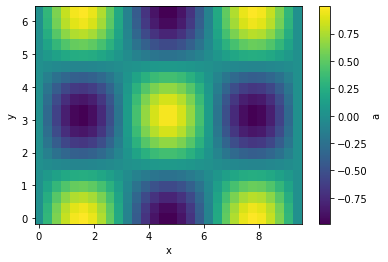

In [5]:
g.plot(cbar=True);

Let's interpolate the values to 200 points along each axis and plot

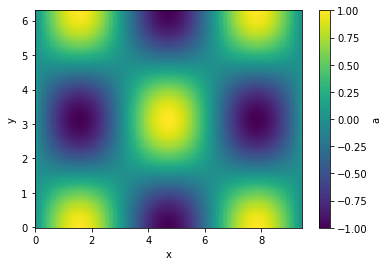

In [6]:
g.interp(x=200, y=200).plot(cbar=True);

Executions of (most) translation methods is _lazy_. That means that the computation only happens if a specific variable is used. This can have some side effects, that when you maipulate the original data before the translation is evaluated. just something to be aware of.

Masking, and item assignement also is supported

In [7]:
g.a[g.a > 0.3]

y \ x,0,0.325,0.65,...,8.77,9.1,9.42
0,--,0.319,0.605,...,0.605,0.319,--
0.331,--,0.302,0.572,...,0.572,0.302,--
0.661,--,--,0.478,...,0.478,--,--
...,...,...,...,...,...,...,...
5.62,--,--,0.478,...,0.478,--,--
5.95,--,0.302,0.572,...,0.572,0.302,--
6.28,--,0.319,0.605,...,0.605,0.319,--


The objects are also numpy compatible and indexable by index (integers) or value (floats). Numpy functions with `axis` keywords accept either the name(s) of the axis, e.g. here `x` and therefore is independent of axis ordering, or the usual integer indices.

In [8]:
g[10::-1, :np.pi:2]

y \ x,3.25,2.92,2.6,...,0.65,0.325,0
0,a = -0.108,a = 0.215,a = 0.516,...,a = 0.605,a = 0.319,a = 0
0.661,a = -0.0853,a = 0.17,a = 0.407,...,a = 0.478,a = 0.252,a = 0
1.32,a = -0.0265,a = 0.0528,a = 0.127,...,a = 0.149,a = 0.0784,a = 0
1.98,a = 0.0434,a = -0.0864,a = -0.207,...,a = -0.243,a = -0.128,a = -0
2.65,a = 0.0951,a = -0.189,a = -0.453,...,a = -0.532,a = -0.281,a = -0


In [9]:
np.sum(g[10::-1, :np.pi:2].T, axis='x')

y,0,0.661,1.32,1.98,2.65
a,6.03,4.76,1.48,-2.42,-5.3


### Comparison
As comparison to point out the convenience, an alternative way without using `dama` to achieve the above would look something like the follwoing for creating and plotting the array:
> ```
> x = np.linspace(0,3*np.pi, 30)
> y = np.linspace(0,2*np.pi, 20) 
>
> xx, yy = np.meshgrid(x, y)
> a = np.sin(xx) * np.cos(yy)
>
> import matplotlib.pyplot as plt
> 
> x_widths = np.diff(x)
> x_pixel_boundaries = np.concatenate([[x[0] - 0.5*x_widths[0]], x[:-1] + 0.5*x_widths, [x[-1] + 0.5*x_widths[-1]]])
> y_widths = np.diff(y)
> y_pixel_boundaries = np.concatenate([[y[0] - 0.5*y_widths[0]], y[:-1] + 0.5*y_widths, [y[-1] + 0.5*y_widths[-1]]])
> 
> pc = plt.pcolormesh(x_pixel_boundaries, y_pixel_boundaries, a)
> plt.gca().set_xlabel('x')
> plt.gca().set_ylabel('y')
> cb = plt.colorbar(pc)
> cb.set_label('a')
```

and for doing the interpolation:

> ```
> from scipy.interpolate import griddata
> 
> interp_x = np.linspace(0,3*np.pi, 200)
> interp_y = np.linspace(0,2*np.pi, 200) 
> 
> grid_x, grid_y = np.meshgrid(interp_x, interp_y)
> 
> points = np.vstack([xx.flatten(), yy.flatten()]).T
> values = a.flatten()
> 
>interp_a = griddata(points, values, (grid_x, grid_y), method='cubic')
```

### PointData

Another representation of data is `PointData`, which is not any different of a dictionary holding same-length nd-arrays or a pandas `DataFrame` (And can actually be instantiated with those).

In [10]:
p = dm.PointData()
p.x = np.random.randn(100_000)
p.a = np.random.rand(p.size) * p.x**2

In [11]:
p

x,1.73,-0.484,0.0993,...,0.226,-0.0637,0.378
a,0.14,0.105,0.00459,...,0.0174,0.00351,0.00574


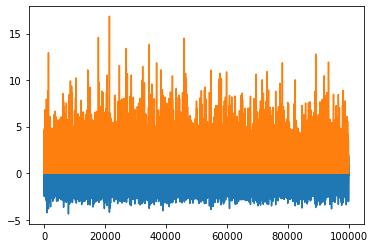

In [12]:
p.plot()

Maybe a correlation plot would be more insightful:

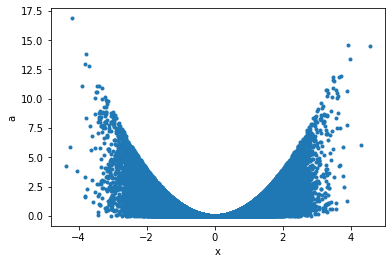

In [13]:
p.plot('x', 'a', '.');

This can now seamlessly be translated into `Griddata`, for example taking the data binwise in `x` in 20 bins, and in each bin summing up points:

In [14]:
p.binwise(x=20).sum()

x,[-4.377 -3.93 ],[-3.93 -3.483],[-3.483 -3.036],...,[3.225 3.672],[3.672 4.12 ],[4.12 4.567]
a,30.8,119,686,...,357,75.6,20.6


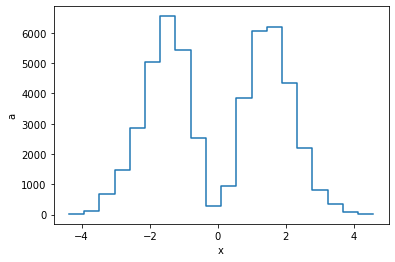

In [15]:
p.binwise(x=20).sum().plot();

This is equivalent of making a weighted histogram, while the latter is faster.

In [16]:
p.histogram(x=20).a

x,[-4.377 -3.93 ],[-3.93 -3.483],[-3.483 -3.036],...,[3.225 3.672],[3.672 4.12 ],[4.12 4.567]
,30.8,119,686,...,357,75.6,20.6


In [17]:
np.allclose(p.histogram(x=10).a, p.binwise(x=10).sum().a)

True

There is also KDE in n-dimensions available, for example:

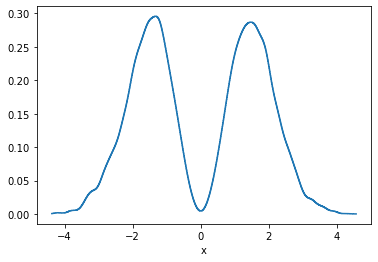

In [18]:
p.kde(x=1000).a.plot();

`GridArrays` can also hold multi-dimensional values, like RGB images or here 5 values from the percentile function. Let's plot those as bands:

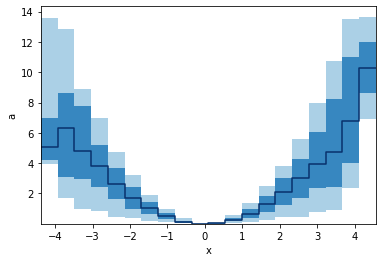

In [19]:
p.binwise(x=20).quantile(q=[0.1, 0.3, 0.5, 0.7, 0.9]).plot_bands()

When we specify `x` with an array, we e gives a list of points to binwise. So the resulting plot will consist of points, not bins.

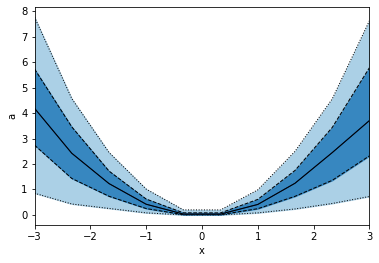

In [20]:
p.binwise(x=np.linspace(-3,3,10)).quantile(q=[0.1, 0.3, 0.5, 0.7, 0.9]).plot_bands(lines=True, filled=True, linestyles=[':', '--', '-'], lw=1)

 This is not the same as using edges as in the example below, hence also the plots look different.

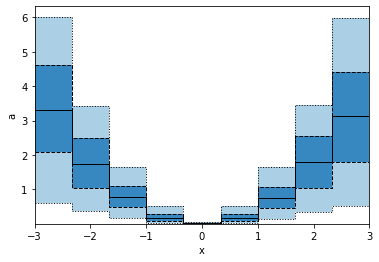

In [21]:
p.binwise(x=dm.Edges(np.linspace(-3,3,10))).quantile(q=[0.1, 0.3, 0.5, 0.7, 0.9]).plot_bands(lines=True, filled=True, linestyles=[':', '--', '-'], lw=1)

# Example gallery

This is just to illustrate some different, seemingly random applications, resulting in various plots. All starting from some random data points

In [22]:
from matplotlib import pyplot as plt

In [23]:
p = dm.PointData()
p.x = np.random.rand(10_000)
p.y = np.random.randn(p.size) * np.sin(p.x*3*np.pi) * p.x
p.a = p.y/p.x

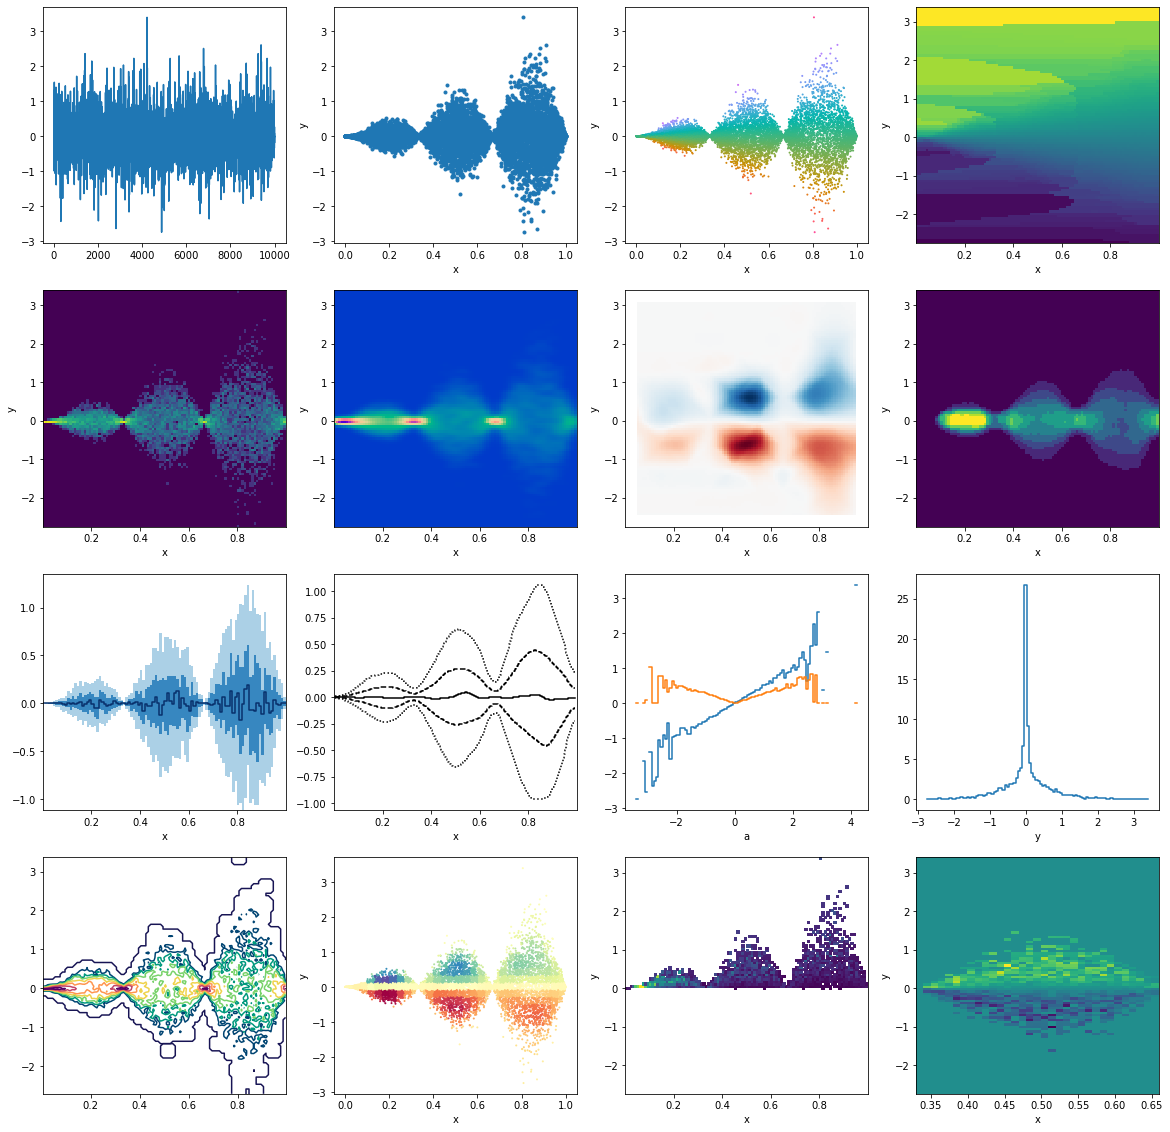

In [24]:
fig, ax = plt.subplots(4,4,figsize=(20,20))
ax = ax.flatten()

# First row
p.y.plot(ax=ax[0])
p.plot('x', 'y', '.', ax=ax[1])
p.plot_scatter('x', 'y', c='a', s=1, cmap=dm.cm.spectrum, ax=ax[2])
p.interp(x=100, y=100, method="nearest").a.plot(ax=ax[3])

# Second row
np.log(1 + p.histogram(x=100, y=100).counts).plot(ax=ax[4])
p.kde(x=100, y=100, bw=(0.02, 0.05)).density.plot(cmap=dm.cm.afterburner_r, ax=ax[5])
p.histogram(x=10, y=10).interp(x=100,y=100).a.plot(cmap="RdBu", ax=ax[6])
p.histogram(x=100, y=100).counts.median_filter(10).plot(ax=ax[7])

# Third row
p.binwise(x=100).quantile(q=[0.1, 0.3, 0.5, 0.7, 0.9]).y.plot_bands(ax=ax[8])
p.binwise(x=100).quantile(q=[0.1, 0.3, 0.5, 0.7, 0.9]).y.gaussian_filter((2.5,0)).interp(x=500).plot_bands(filled=False, lines=True, linestyles=[':', '--', '-'],ax=ax[9])
p.binwise(a=100).mean().y.plot(ax=ax[10])
p.binwise(a=100).std().y.plot(ax=ax[10])

# Fourth row
p.histogram(x=100, y=100).counts.std(axis='x').plot(ax=ax[11])
np.log(p.histogram(x=100, y=100).counts + 1).gaussian_filter(0.5).plot_contour(cmap=dm.cm.passion_r, ax=ax[12])
p.histogram(x=30, y=30).gaussian_filter(1).lookup(p).plot_scatter('x', 'y', 'a', 1, cmap='Spectral', ax=ax[13])
h = p.histogram(y=100, x=100).a.T
h[h>0].plot(ax=ax[14])
h[1/3:2/3].plot(ax=ax[15])